In [1]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
1.19.2
1.1.3


In [2]:
# Load PIRUS Data
pirus = pd.read_csv('../data/clean_data/pirus_deep_clean_Final.csv')

# Load PIRUS Codebook
with open('../data/clean_data/pirus_codebook.json') as f:
    pirus_codebook = json.load(f)

# Load Custom Color Map
cmap = ['#E7E3DF', '#3186A9', '#EEAD9A', '#DBB03B', '#66759A', '#EBD79F', '#83684C', '#6D6E72', '#965341', '#8F917F', '#010503']

In [3]:
# Dictionary of simplified marital_status codes
new_marital_codes = {4:'Widowed',3:'Divorced',2:'Married',1:'Single'}

# Isolate gender codes dictionary in pirus_codebook
gender_codes = pirus_codebook['gender']['codes']

# Capture data of interest in df
gendered_relationships = pd.DataFrame(pirus[['gender','marital_status', 'subject_id']])

# Drop rows with NaNs in maritial_status 
gendered_relationships = gendered_relationships.dropna(subset=['marital_status'])

# Change numerical marital_status & gender values to coded ones
gendered_relationships['marital_status'] = gendered_relationships['marital_status'].apply(lambda x:new_marital_codes[int(x)])
gendered_relationships['gender'] = gendered_relationships['gender'].apply(lambda x:gender_codes[str(int(x))])

# Count subject_ids by marital_status & gender
gendered_relationships = gendered_relationships['subject_id'].groupby([gendered_relationships['marital_status'], gendered_relationships['gender']]).count().to_frame(name = '# of Instances').reset_index()

# Sort output by # of Instances in ascending order
gendered_relationships = gendered_relationships.sort_values('# of Instances', ascending = False)

gendered_relationships

,marital_status,gender,# of Instances
5,Single,Male,611
3,Married,Male,362
1,Divorced,Male,98
2,Married,Female,64
4,Single,Female,44
0,Divorced,Female,10
6,Widowed,Female,6
7,Widowed,Male,6


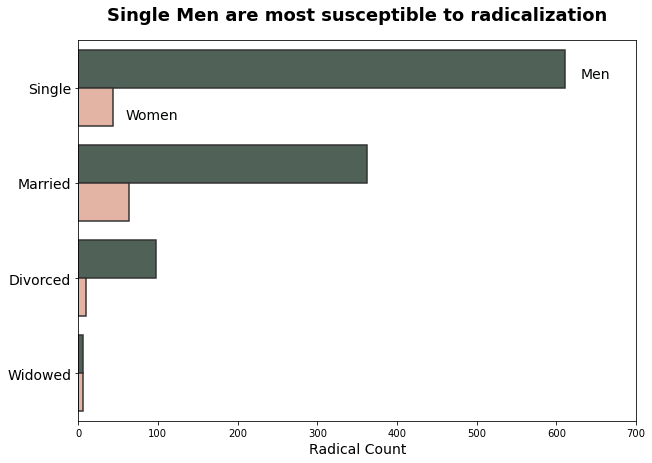

In [4]:
# Plot figure
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x = '# of Instances', y = 'marital_status', 
            hue = 'gender', data = gendered_relationships, palette = ['#4d6456','#EEAD9A'], dodge=True, 
            linewidth=1.5, errcolor=".2", edgecolor=".2")

# Set title
ax.set_title('Single Men are most susceptible to radicalization', weight='bold',
             loc = 'center', pad = 20).set_fontsize('18')

# Set y axis
ax.set_ylabel("")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.yaxis.set_label_coords(0.15,1.025)

# Set x axis 
ax.set_xlabel("Radical Count", fontsize = 14)
ax.set(xlim = (0,700))

# Remove Legend
ax.get_legend().remove()

# Add annotations
annote1 = 'Men'
plt.text(630, -.1, annote1, horizontalalignment='left', size=14, color='#010503', weight='normal')

annote2 = 'Women'
plt.text(60, .33, annote2, horizontalalignment='left', size=14, color='#010503', weight='normal')

plt.show()